In [2]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'text.fontsize': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from load_rayfile import load_rayfile
rlf = load_rayfile(directory,200)
#print rlf

In [75]:
from calc_scattering import calc_scattering
import time

directory='/Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/python/'
center_lat=45
lower_freq=200
upper_freq=240
L_shells= 2.5
I0 = -100000
dlat = 1


#tstart = time.time()
ray_crossings = calc_scattering(directory, I0, center_lat, lower_freq, upper_freq, L_shells, dlat)
#tstop = time.time()

#print "Elapsed time: %g seconds"%(tstop - tstart)

loading  /Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/python/newray200.dat
loading  /Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/python/newray240.dat
Ray starting at 31 degrees
testing 22 cases (coarse grid)
(344, 22)
Ray starting at 32 degrees
testing 22 cases (coarse grid)
(373, 22)
Ray starting at 33 degrees
testing 22 cases (coarse grid)
(375, 22)
Ray starting at 34 degrees
testing 21 cases (coarse grid)
(337, 22)
Ray starting at 35 degrees
testing 19 cases (coarse grid)
(274, 22)
Ray starting at 36 degrees
testing 18 cases (coarse grid)
(204, 22)
Ray starting at 37 degrees
testing 16 cases (coarse grid)
(136, 22)
Ray starting at 38 degrees
testing 15 cases (coarse grid)
(90, 22)
Ray starting at 39 degrees
testing 13 cases (coarse grid)
(49, 22)
Ray starting at 40 degrees
testing 11 cases (coarse grid)
(8, 22)
Ray starting at 41 degrees
testing 10 cases (coarse grid)
(0, 22)
Ray starting at 42 degrees
testing 8 cases (coarse grid)
(0, 22)
Ray starting at 43 degrees
testin

In [76]:
print ray_crossings['cross_coords'].shape

from calc_scattering import calc_resonant_pitchangle_change
from calc_scattering import gen_EA_array
from calc_scattering import get_flight_time_constant

L_targ = L_shells
EA_array = gen_EA_array(L_targ)

# print EA_array
DA_N, DA_S = calc_resonant_pitchangle_change(ray_crossings, L_targ)

#for lat, lat_ind in enumerate(EA_array['lam']):
#    print lat, lat_ind
#print ray_crossings
#for cell in ray_crossings[:
#    print cell.shape
#tmp = ray_crossings[ray_crossings['LAT']==]

# #print tmp.shape
# print ray_crossings.columns
# plt.plot(ray_crossings.frequency,'.')



(2190,)
EA segment at latitude =  -14.0
(2, 22)
EA segment at latitude =  -13.0
(8, 22)
EA segment at latitude =  -12.0
(16, 22)
EA segment at latitude =  -11.0
(27, 22)
EA segment at latitude =  -10.0
(38, 22)
EA segment at latitude =  -9.0
(50, 22)
EA segment at latitude =  -8.0
(59, 22)
EA segment at latitude =  -7.0
(65, 22)
EA segment at latitude =  -6.0
(78, 22)
EA segment at latitude =  -5.0
(81, 22)
EA segment at latitude =  -4.0
(85, 22)
EA segment at latitude =  -3.0
(88, 22)
EA segment at latitude =  -2.0
(86, 22)
EA segment at latitude =  -1.0
(88, 22)
EA segment at latitude =  0.0
(85, 22)
EA segment at latitude =  1.0
(82, 22)
EA segment at latitude =  2.0
(82, 22)
EA segment at latitude =  3.0
(83, 22)
EA segment at latitude =  4.0
(81, 22)
EA segment at latitude =  5.0
(77, 22)
EA segment at latitude =  6.0
(75, 22)
EA segment at latitude =  7.0
(70, 22)
EA segment at latitude =  8.0
(74, 22)
EA segment at latitude =  9.0
(66, 22)
EA segment at latitude =  10.0
(60, 22)

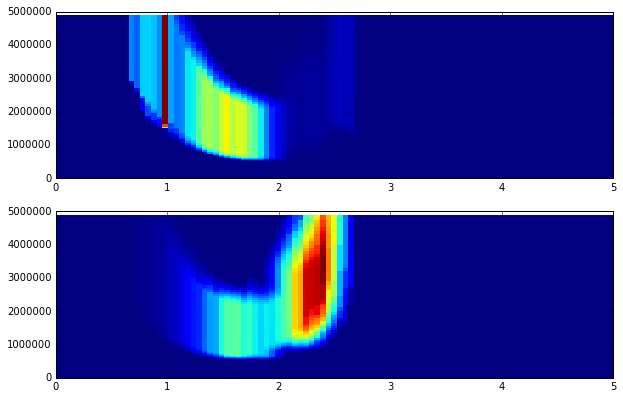

In [77]:
tvec = np.linspace(0, sc.T_MAX,sc.NUM_STEPS)

ax1 = plt.subplot(2,1,1)
plt.pcolor(tvec, sc.E_tot_arr,DA_N)

ax2 = plt.subplot(2,1,2)
plt.pcolor(tvec,sc.E_tot_arr,DA_S)


In [80]:
np.max(DA_N)

8.8269419181346637e-24

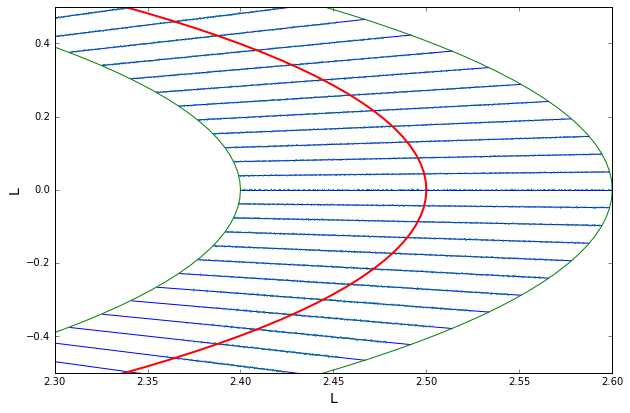

In [47]:
# Plot the equal-area slices, along with fieldlines, to show that the coordinates are right.
from calc_scattering import gen_EA_array
from matplotlib import collections  as mc
import sim_consts as sc

L_targ = L_shells
EA = gen_EA_array(L_targ)

# Initialize plot
fig, ax = plt.subplots()

# Plot the earth
earth = plt.Circle((0,0),1,color='k',alpha=0.3)

# Plot the fieldline
lam = np.linspace(-50,50,181)
L_r = L_targ*pow(np.cos(lam*sc.D2R),2)
Lx  = L_r*np.cos(lam*sc.D2R)
Ly  = L_r*np.sin(lam*sc.D2R)

# Plot the margin fieldlines
Lmr1 = (L_targ + sc.L_MARGIN)*pow(np.cos(lam*sc.D2R),2)
Lmr1x= Lmr1*np.cos(lam*sc.D2R)
Lmr1y= Lmr1*np.sin(lam*sc.D2R)
Lmr2 = (L_targ - sc.L_MARGIN)*pow(np.cos(lam*sc.D2R),2)
Lmr2x= Lmr2*np.cos(lam*sc.D2R)
Lmr2y= Lmr2*np.sin(lam*sc.D2R)

# Plot Equal-Area slices
po = zip(EA['x1'],EA['y1'])
p1 = zip(EA['x2'],EA['y2'])
points = zip(po, p1)
lc = mc.LineCollection(points)

# Plot Ray Crossing Segments
rayc = mc.LineCollection(ray_crossings['cross_coords'],colors=(0,0.5,0.5,1))


plt.plot(Lx,Ly,color='r',linewidth=2)  # Field line
plt.plot(Lmr1x, Lmr1y,color='g')       # Outer boundary
plt.plot(Lmr2x, Lmr2y,color='g')       # Inner boundary
ax.add_patch(earth)                    # The earth (round)
ax.add_collection(lc)                  # Equal-Area segments
ax.add_collection(rayc)                # Crossed ray segments

ax.autoscale()
ax.set_xlim([2.3,2.6])
ax.set_ylim([-0.5,0.5])
ax.set_xlabel('L')
ax.set_ylabel('L')



plt.show()

In [ ]:
tmp = ray_crossings[0]
tmp.values()
print np.shape(tmp.values())

print tmp.values()


#ray_segments = mc.LineCollection(tmp.values(),colors=(1,0,0,1))



po_ray = []
p1_ray = []
for row in tmp.values():
    po_ray.append(row[0])
    p1_ray.append(row[1])




In [ ]:
print ray_crossings

In [ ]:
from load_rayfile import load_rayfile
rf = load_rayfile(directory,200)

tb = rf[35].ELE > 2.5
#print rf[35].iloc[1]
#print rf[35][tb]
x = rf[35][tb]
y = np.linspace(1,50,50)
tmp = np.flat(np.outer(x,y))
print np.shape(tmp)

In [ ]:
import sim_consts as sc

#EA_NUMROWS = (sc.EALimN - sc.EALimS) / sc.EAIncr + 1
#EA_NUMCOLS = 1 + 8*NUM_TARGS;

lam_vec = np.arange(sc.EALimS,sc.EALimN, step=sc.EAIncr)
L_TARG = 2.5

# Trig functions
clam = np.cos(lam_vec*sc.D2R)
slam = np.sin(lam_vec*sc.D2R)
clam2= pow(clam,2)
slam2= pow(slam,2)
rootTerm = np.sqrt(1 + 3*slam2)

# dl_lam: still not sure where he gets this expression from
dl_lam = (clam2*clam / rootTerm)*sc.DL0

x_unit_vect = (3*clam2 - 2) / rootTerm
y_unit_vect = (3*slam*clam) / rootTerm


ptR = L_TARG*clam2  # Distance to field line (dipole model: r ~ L cos(latitude)^2 )
ptX = ptR*clam      # Field line in Cartesian coordinates
ptY = ptR*slam

# Coordinates of the edges of the window
x1 = ptX - x_unit_vect*dl_lam
x2 = ptX + x_unit_vect*dl_lam
y1 = ptY - y_unit_vect*dl_lam
y2 = ptY + y_unit_vect*dl_lam

# Output parameters:
d = pd.DataFrame(index=lam_vec,columns=['x1','x2','y1','y2','EAa','EAb','EAc','EA_length'])
d['EAa'] = y1 - y2
d['EAb'] = x2 - x1
d['EAc'] = x1*y2 - y1*x2
d['EA_length'] = np.sqrt(pow(x1-x2,2)+pow(y1-y2,2))*sc.R_E
d['x1'] = x1
d['x2'] = x2
d['y1'] = y1
d['y2'] = y2

#print d
d['EA_length'].plot()


In [ ]:
import sim_consts as sc

# Generate fine-scale interpolating factors
lat_fine_grid = np.linspace(0, 1, sc.DIV_LAT_NUM)
freq_fine_grid= np.linspace(0, 1, sc.DIV_FREQ_NUM)
interp_grid = []
for l in lat_fine_grid:
    for f in freq_fine_grid:
        interp_grid.append([l, f])

interp_grid = np.array(interp_grid)
BL_fact = 1 - interp_grid[:,0]-interp_grid[:,1] + interp_grid[:,0]*interp_grid[:,1]
TL_fact = interp_grid[:,0] - interp_grid[:,0]*interp_grid[:,1]
BH_fact = interp_grid[:,1] - interp_grid[:,0]*interp_grid[:,1]
TH_fact = interp_grid[:,0]*interp_grid[:,1]

w = pd.DataFrame(columns=['a','b','c'])
w['a'] = BL_fact

In [52]:
from scipy import special

scipy.special.jn(1,0)